In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from pandas.plotting import autocorrelation_plot

In [39]:
train_df = pd.read_csv("observations_train.csv")
test_df = pd.read_csv("observations_test.csv")

In [173]:
train_df['date']=pd.to_datetime(train_df["date"])
test_df['date']=pd.to_datetime(test_df["date"])
train_df.set_index('date')
test_df.set_index('date')

,Unnamed: 0,series_id,value
date,,,
2018-01-02,0,AAA10Y,1.06
2018-01-03,1,AAA10Y,1.06
2018-01-04,2,AAA10Y,1.01
2018-01-05,3,AAA10Y,1.03
2018-01-08,4,AAA10Y,1.01
2018-01-09,5,AAA10Y,1.02
2018-01-10,6,AAA10Y,1.03
2018-01-11,7,AAA10Y,0.99
2018-01-12,8,AAA10Y,0.95


TypeError: formatter argument should be instance of matplotlib.ticker.Formatter

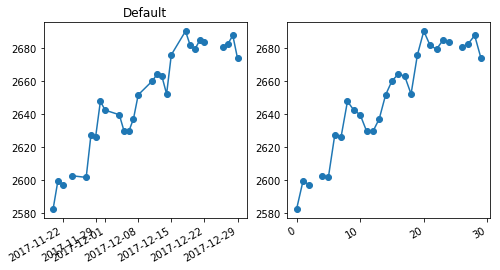

In [174]:
r = train_df[train_df['series_id']=="SP500"]
r = r[-30:]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.plot(r.date, r.value, 'o-')
ax1.set_title("Default")
fig.autofmt_xdate()

N = len(r)
ind = np.arange(N)


def format_date(x, pos=None):
    thisind = np.clip(int(x), 0, N - 1)
    return r.date[thisind].item()


ax2.plot(ind, r.value, 'o-')
ax2.xaxis.set_major_formatter(format_date)
ax2.set_title("Custom tick formatter")
fig.autofmt_xdate()

plt.show()

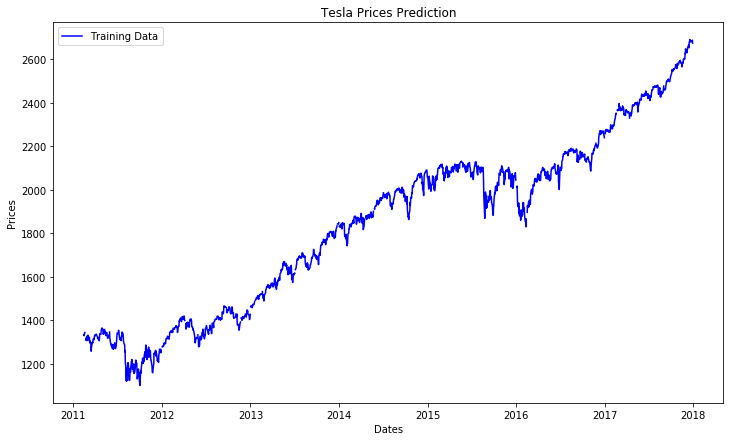

In [175]:
temp = train_df[train_df['series_id']=="SP500"]
temp = temp.drop(columns='series_id').set_index('date')
plt.figure(figsize=(12,7))
plt.plot(temp, 'green', color='blue', label='Training Data')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [187]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SP500 = train_df[train_df['series_id']=='SP500'].set_index('date')
model = SARIMAX(SP500.value[-100:], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              value   No. Observations:                  100
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -313.640
Date:                            Sat, 10 Apr 2021   AIC                            637.280
Time:                                    12:48:30   BIC                            649.610
Sample:                                08-14-2017   HQIC                           642.245
                                     - 12-29-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0961      0.181     -0.532      0.595      -0.450       0.258
ar.S.L12      -0.4028      0.235     -1.713      0.087      -0.864       0.058
ar.S.L24      -0.3373      0.183     -1.843      0.065      -0.696       0.021
ma.S.L12      -0.4739      0.266     -1.779      0.075      -0.996       0.048
sigma2        86.0874     10.722      8.029      0.000      65.073     107.102
===================================================================================
Ljung-Box (Q):                       48.13   Jarque-Bera (JB):                18.60
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.91
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


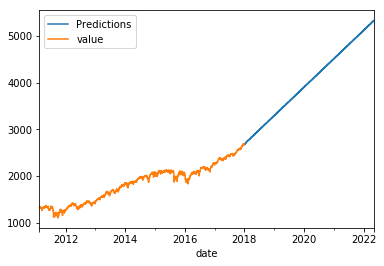

In [188]:
start = 100
end = 100 + len(np.unique(test_df['date'])) - 1
  
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
  
predictions.plot(legend = True)
SP500.value.plot(legend = True)

In [189]:
df = pd.DataFrame()
for col in np.unique(train_df['series_id']):
    temp = train_df[train_df['series_id']==col].set_index('date')
    SP500 = train_df[train_df['series_id']=='SP500'].set_index('date')
    idx = pd.date_range(min(np.unique(SP500.index)), max(np.unique(SP500.index)))
    temp.index = pd.DatetimeIndex(temp.index)
    temp = temp.reindex(idx, fill_value=None)
    temp['series_id']=col
    temp['value'] = temp['value'].interpolate(method='time')
    df = df.append(temp)
df

AttributeError: 'DataFrame' object has no attribute 'na'